# Exploratory Data Analysis
a crucial step in the data analysis process that involves examining and visualizing data sets to understand their key characteristics, patterns, and relationships. 

Some common techniques and approaches used in EDA:

#### Descriptive Statistics:

- Calculate basic statistics such as mean, median, mode, standard deviation, range, and percentiles to summarize the main features of the dataset.
#### Data Cleaning:

- Handle missing values, duplicate records, and outliers. Impute or remove missing data appropriately.
#### Univariate Analysis:

- Explore individual variables one at a time. 
Use 
    - histograms
    - box plots
    - summary statistics 

to understand the distribution of each variable.
#### Bivariate Analysis:

- Explore relationships between pairs of variables. 
    - Scatter plots
    - correlation coefficients
    - cross-tabulations 

are useful for understanding how variables interact.
#### Multivariate Analysis:

- Explore relationships involving three or more variables. Techniques like heatmaps and pair plots can help visualize interactions.
#### Data Visualization:

- Use charts and graphs such as histograms, bar plots, line charts, box plots, and heatmaps to visually represent the data.
#### Outlier Detection:

- Identify and handle outliers that might skew the analysis. Box plots and scatter plots can be helpful in identifying outliers.
#### Feature Engineering:

- Create new variables or transform existing ones to better represent the underlying patterns in the data.
#### Pattern Recognition:

- Identify trends, patterns, and anomalies in the data. Time series analysis and clustering techniques can be useful for detecting patterns.
#### Hypothesis Testing:

- Formulate and test hypotheses based on the patterns observed. Statistical tests can be employed to validate or reject hypotheses.
#### Interactive Exploration:

- Utilize interactive tools and dashboards to explore data dynamically, enabling a deeper understanding of patterns and relationships.
#### Documentation:

- Document findings, insights, and the steps taken during EDA. This documentation is valuable for collaboration and for reproducing analyses.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handle Null values

#### df.isnull(): 
This creates a DataFrame of the same shape as df where each entry is True if the corresponding entry in df is NaN (null), and False otherwise

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### Heatmap
A heatmap is a graphical representation of data in a matrix format where individual values are represented as colors.


#### yticklabels=False: 
This parameter removes the y-axis tick labels.

#### cbar=False: 
This parameter removes the color bar on the side of the heatmap.

#### cmap='viridis': 
This parameter sets the color map to 'viridis'. You can choose a different color map based on your preference.

<Axes: >

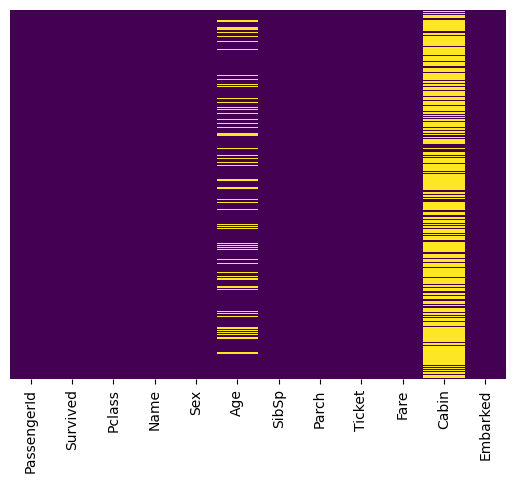

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Roughly 20% of the age data is missing. so we will replace null values with the average of 'Age'.

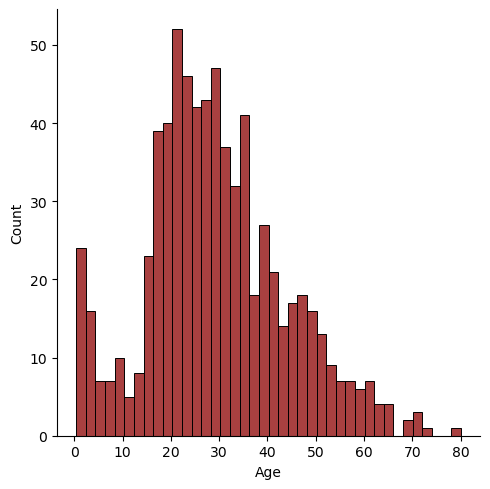

In [13]:
sns.displot(df['Age'],kde=False,color='darkred',bins=40)

#### set_style('whitegrid'): 
This Seaborn function sets the aesthetic style of the plots. In this case, it's setting the style to have a white background with grid lines.
Replace 'whitegrid' with other options like 'darkgrid', 'white', 'dark', 'ticks', etc. Each style provides a different visual appearance for your plots.

<Axes: xlabel='Survived', ylabel='count'>

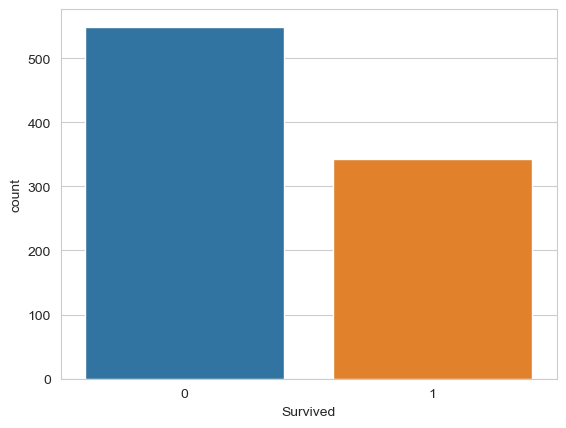

In [14]:
sns.set_style('whitegrid')
sns.countplot(df,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

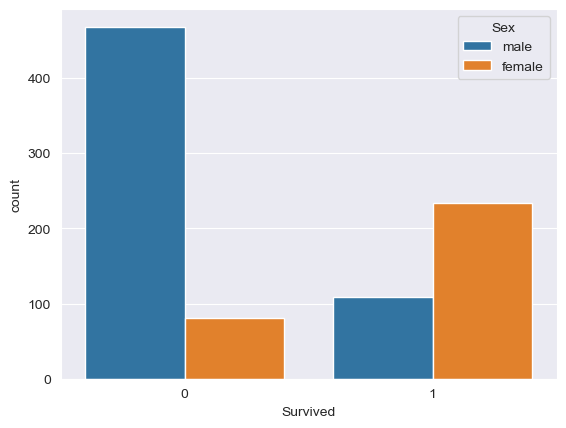

In [15]:
sns.set_style('darkgrid')
sns.countplot(df,hue='Sex', x='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

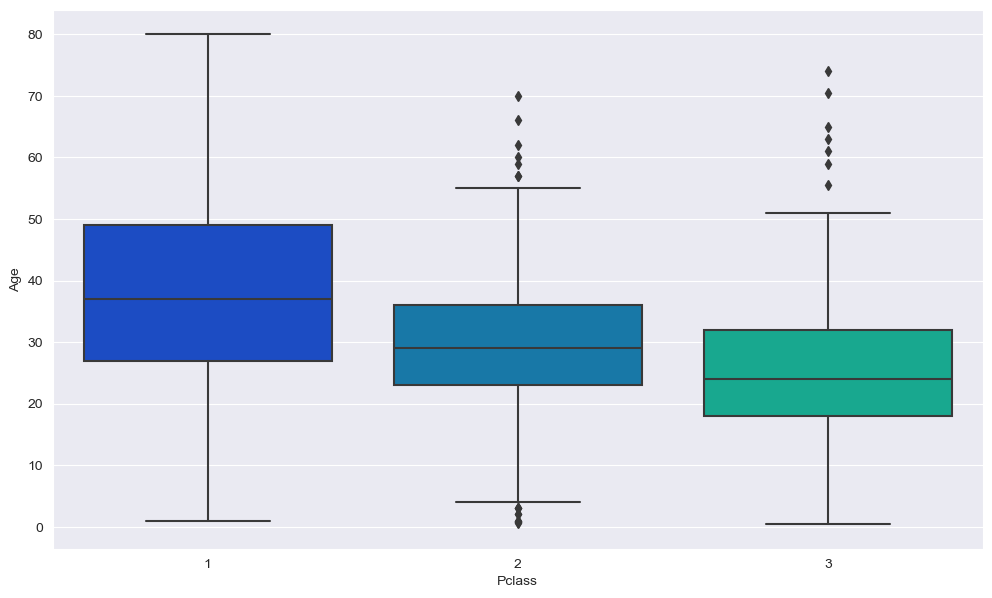

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(df,x='Pclass', y='Age', palette='winter')

we can see the wealthier passengers in the higher classes tend to be older, which makes sense we'll use these average age values to impute based on Pclass for Age.

We get average of 'Age' under each class and we replace the null values with these average values.

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else: 
        return Age

In [18]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

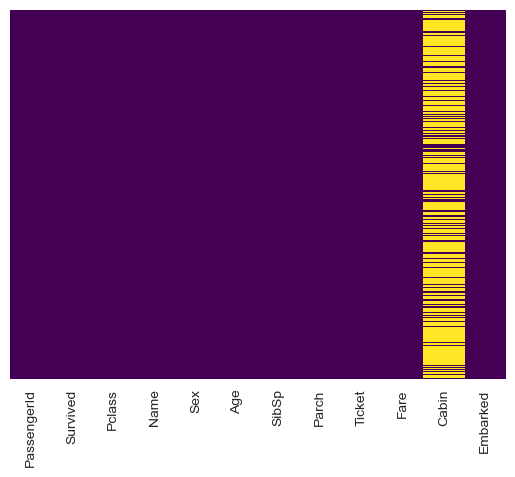

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [20]:
# Drop cabin column cause full of null values
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- this operation does not modify the original DataFrame in-place unless you explicitly set the inplace parameter to True.
- Remember, axis=1 is used to specify that we're dropping a column.

<Axes: >

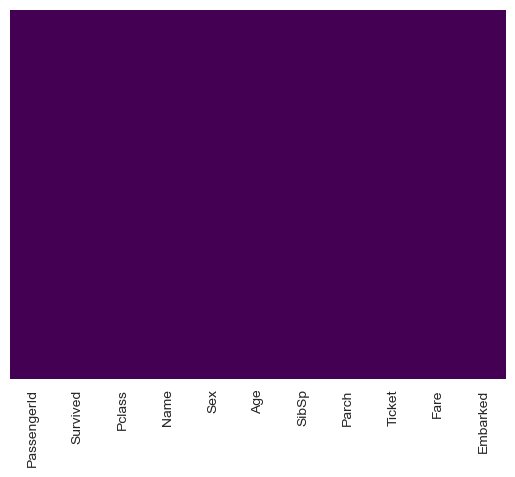

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

The dropna() method removes the rows that contains NULL values.

## Categorical Encoding

#### pd.get_dummies()
is used to convert categorical variable(s) into dummy/indicator variables. It creates a new DataFrame where each unique value in the original categorical column becomes a new column with binary values (0 or 1).

'C', 'Q', and 'S' are the unique values in the 'Embarked' column using which we can create 2^3 categories using binary numbers. but here there only require 2 categories for 'Sex' and 3 category for 'Embarked' so we drop 'C' column in each column

In [22]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [24]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [25]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
df=pd.concat([df,sex,embark],axis=1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Building a Logistic Regression Model

### Train Test Split

In [29]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [30]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1)
                                                ,df['Survived'],test_size=0.30,
                                                random_state=101)

#### test_size()
parameter is set to 0.30, meaning 30% of the data will be used for testing, and the remaining 70% will be used for training.
#### random_state
parameter is optional but useful for reproducibility. If you want the same split every time you run the code, keep the random_state value fixed.

### Training and Prediction

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\91990\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = logmodel.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
accuracy=confusion_matrix(y_test,predictions)

In [38]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7686567164179104

In [41]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# Finally we are applying Logistic Regression for the prediction of the survived column.
